In [1]:
import fredapi as fa
import pandas as pd
#from local_settings import fred as settings
fred = fa.Fred(api_key='c065c27b3c6b11150d20e30606f2f099')
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Import libraries

from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta, date
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
#  Housing Inventory: Median Days on Market in the United States
# https://fred.stlouisfed.org/series/OBMMIFHA30YF
fred_housing1 = fred.get_series('MEDDAYONMARUS')
fred_housing1.name = 'fred_1'
fred_housing1.head()

2016-07-01    69.0
2016-08-01    73.0
2016-09-01    78.0
2016-10-01    79.0
2016-11-01    83.0
Name: fred_1, dtype: float64

In [4]:
#  Median Sales Price of Houses Sold for the United States 
# https://fred.stlouisfed.org/series/MSPUS
fred_housing2 = fred.get_series('MSPUS')
fred_housing2.name = 'fred_2'
fred_housing2.head()

1963-01-01    17800.0
1963-04-01    18000.0
1963-07-01    17900.0
1963-10-01    18500.0
1964-01-01    18500.0
Name: fred_2, dtype: float64

In [5]:
# Getting all the stock data (NVR, etc.)
stockSymbols = ['NVR','SPY']

In [6]:
# Getting the stock start date
Stock_dt = '2021-01-01'

# Getting end date
end_date = '2021-11-30'


In [7]:
# Getting today's date
#today = datetime.today().strftime('%Y-%m-%d')
#today

In [8]:
# Number of assets
num_assets = len(stockSymbols)

In [9]:
# creating a fn 
def getMyAssets(stock=stockSymbols, start=Stock_dt,end=end_date,col='Adj Close'):
    data = pdr.get_data_yahoo(stock, start = start, end=end)[col]
    return data

In [10]:
# Getting the adj. close prices
my_stocks = getMyAssets(stockSymbols)

[*********************100%***********************]  2 of 2 completed


In [11]:
my_stocks

,NVR,SPY
Date,,
2021-01-04,4040.649902,361.251129
2021-01-05,4008.909912,363.739197
2021-01-06,3966.489990,365.913818
2021-01-07,4025.929932,371.350372
2021-01-08,3930.000000,373.466248
...,...,...
2021-11-22,5210.819824,462.492249
2021-11-23,5320.000000,463.105499
2021-11-24,5351.399902,464.341919


In [12]:
df=pd.merge(my_stocks, fred_housing1, how='left',left_index=True, right_index=True)

In [13]:
df=pd.merge(df, fred_housing2, how='left',left_index=True, right_index=True)

In [14]:
# Creating a new df and using only the adj. close price
#df = my_stocks
df

,NVR,SPY,fred_1,fred_2
Date,,,,
2021-01-04,4040.649902,361.251129,NaN,NaN
2021-01-05,4008.909912,363.739197,NaN,NaN
2021-01-06,3966.489990,365.913818,NaN,NaN
2021-01-07,4025.929932,371.350372,NaN,NaN
2021-01-08,3930.000000,373.466248,NaN,NaN
...,...,...,...,...
2021-11-22,5210.819824,462.492249,NaN,NaN
2021-11-23,5320.000000,463.105499,NaN,NaN
2021-11-24,5351.399902,464.341919,NaN,NaN


In [15]:
df.drop(columns=['fred_2','fred_1'],inplace=True)

In [16]:
#df.fillna(method='bfill', inplace=True)

In [17]:
#df.fillna(method='ffill', inplace=True)

In [18]:
df

,NVR,SPY
Date,,
2021-01-04,4040.649902,361.251129
2021-01-05,4008.909912,363.739197
2021-01-06,3966.489990,365.913818
2021-01-07,4025.929932,371.350372
2021-01-08,3930.000000,373.466248
...,...,...
2021-11-22,5210.819824,462.492249
2021-11-23,5320.000000,463.105499
2021-11-24,5351.399902,464.341919


In [19]:
# creating a variable for predicting stock price for n number of days into the future
forecast_out = 30
df['Prediction'] = df[['NVR']].shift(-forecast_out)
df

,NVR,SPY,Prediction
Date,,,
2021-01-04,4040.649902,361.251129,4704.399902
2021-01-05,4008.909912,363.739197,4705.979980
2021-01-06,3966.489990,365.913818,4705.450195
2021-01-07,4025.929932,371.350372,4656.029785
2021-01-08,3930.000000,373.466248,4699.580078
...,...,...,...
2021-11-22,5210.819824,462.492249,NaN
2021-11-23,5320.000000,463.105499,NaN
2021-11-24,5351.399902,464.341919,NaN


In [20]:
df.columns

Index(['NVR', 'SPY', 'Prediction'], dtype='object')

In [21]:
#scaler=MinMaxScaler()

In [22]:
#df[['NVR', 'SPY', 'fred_h', 'Prediction']]=scaler.fit_transform(df[['NVR', 'SPY', 'fred_h', 'Prediction']])

In [23]:
df

,NVR,SPY,Prediction
Date,,,
2021-01-04,4040.649902,361.251129,4704.399902
2021-01-05,4008.909912,363.739197,4705.979980
2021-01-06,3966.489990,365.913818,4705.450195
2021-01-07,4025.929932,371.350372,4656.029785
2021-01-08,3930.000000,373.466248,4699.580078
...,...,...,...
2021-11-22,5210.819824,462.492249,NaN
2021-11-23,5320.000000,463.105499,NaN
2021-11-24,5351.399902,464.341919,NaN


In [24]:
# Creating the independent dataset (X) and convertng to a numpy array
X = np.array(df.drop(['Prediction'],1))

# Removing the last n rows to remove NaNs
X = X[:-forecast_out]
X

array([[4040.64990234,  361.25112915],
       [4008.90991211,  363.73919678],
       [3966.48999023,  365.91381836],
       [4025.92993164,  371.35037231],
       [3930.        ,  373.46624756],
       [3986.87011719,  370.94882202],
       [3963.18994141,  371.02713013],
       [3971.39990234,  372.02627563],
       [3975.05004883,  370.72344971],
       [4009.94995117,  368.01989746],
       [4160.        ,  370.90957642],
       [4278.81982422,  376.04248047],
       [4451.5       ,  376.38534546],
       [4485.91015625,  375.0531311 ],
       [4540.        ,  376.5322876 ],
       [4545.72021484,  375.94451904],
       [4535.        ,  366.75628662],
       [4518.20996094,  369.91046143],
       [4446.47998047,  362.50500488],
       [4530.        ,  368.53909302],
       [4509.97998047,  373.75030518],
       [4499.56982422,  374.04418945],
       [4552.10986328,  378.29541016],
       [4668.41015625,  379.78439331],
       [4740.93017578,  382.52716064],
       [4699.74023438,  3

In [25]:
# Creating the dependent dataset (y) and convertig to a numpy array
y = np.array(df['Prediction'])

# Getting all the y values except the last n rows, to remove NaNs
y = y[:-forecast_out]
y

array([4704.39990234, 4705.97998047, 4705.45019531, 4656.02978516,
       4699.58007812, 4699.97021484, 4491.41992188, 4500.83984375,
       4572.95996094, 4657.95996094, 4483.85009766, 4441.29980469,
       4624.62011719, 4699.75976562, 4702.08984375, 4776.41015625,
       4584.74023438, 4538.83007812, 4670.25      , 4629.04003906,
       4662.33007812, 4421.85009766, 4434.99023438, 4503.64013672,
       4463.10009766, 4539.64990234, 4567.85986328, 4722.74023438,
       4668.25976562, 4706.10986328, 4710.93017578, 4785.18017578,
       4827.43994141, 4837.77978516, 4776.41015625, 4748.49023438,
       4902.12988281, 4873.72998047, 4821.02001953, 4821.43994141,
       4844.22021484, 4984.85009766, 4984.41992188, 4906.22021484,
       4800.        , 4826.37011719, 4862.58984375, 4929.52978516,
       4978.81005859, 5005.62988281, 5023.91015625, 5018.10009766,
       5124.06982422, 5104.95019531, 5142.41992188, 5134.43994141,
       5211.37988281, 5215.81005859, 4988.02978516, 4749.37011

In [26]:
# splitting the data into training and testing set (80/20)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [27]:
# Creating and training the SVM model (Regressor)
svr_rbf = SVR(kernel = 'rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)


SVR(C=1000.0, gamma=0.1)

In [28]:
# Testing the model: score returns the coeff. of determination R^2 of predictions
svm_confidence = svr_rbf.score(x_test,y_test)
svm_confidence

0.06503421250160668

In [29]:
# Creating and training the linear regression model
lr = LinearRegression()

# Training the model
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
# Testing the model: score returns the coeff. of determination R^2 of predictions
lr_confidence = lr.score(x_test,y_test)
lr_confidence

0.4693059240405766

In [31]:
# Creating and training the random forest model
rf = RandomForestRegressor(n_estimators=100,max_depth=5)

# Training the model
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=5)

In [32]:
# Testing the model: score returns the coeff. of determination R^2 of predictions
rf_confidence = rf.score(x_test,y_test)
rf_confidence

0.5313382123034193

In [33]:
# Setting x_test (forecast) for last 30 rows using Adj. Close
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
x_forecast

array([[5010.79003906,  442.33355713],
       [5034.70019531,  445.74612427],
       [5051.08984375,  447.49688721],
       [4900.        ,  448.6640625 ],
       [4875.5       ,  448.19918823],
       [4878.41992188,  450.6027832 ],
       [4870.97998047,  451.00830078],
       [4815.        ,  449.01025391],
       [4900.        ,  453.3427124 ],
       [4894.79980469,  454.26260376],
       [4927.66992188,  455.04403687],
       [4908.31005859,  456.88381958],
       [5020.02001953,  459.67321777],
       [5052.37988281,  461.8394165 ],
       [5089.24023438,  463.4418335 ],
       [5087.93017578,  463.83746338],
       [5200.27001953,  462.30432129],
       [5114.95019531,  458.58514404],
       [5149.52978516,  458.73352051],
       [5253.81005859,  462.19546509],
       [5277.97998047,  462.35375977],
       [5166.        ,  464.18365479],
       [5160.        ,  463.05606079],
       [5109.99023438,  464.6288147 ],
       [5216.00976562,  463.79794312],
       [5210.81982422,  4

In [34]:
# Printing SVM predictions for next n days
svr_prediction = svr_rbf.predict(x_forecast)
#svr_prediction=scaler.inverse_transform([svr_prediction])
svr_prediction

array([4936.24130232, 4933.33841589, 4976.95332775, 4936.24115432,
       4936.24115432, 4936.24115432, 4936.24115432, 4936.24115432,
       4936.24115432, 4936.24115432, 4936.24115431, 4936.24115432,
       4936.24115432, 4936.24115432, 4936.24115432, 4936.24115432,
       4936.24115432, 4936.24115432, 4936.24115432, 4936.24115432,
       4936.24115432, 4936.24115432, 4936.24115432, 4936.24115432,
       4936.24115432, 4936.24115432, 4936.24115432, 4936.24115432,
       4936.24115432, 4936.24115432])

In [35]:
# Printing LR predictions for next n days
lr_prediction = lr.predict(x_forecast)
lr_prediction

array([5101.55198208, 5118.78276831, 5126.42087571, 5178.74221774,
       5182.58746061, 5198.7817937 , 5203.82640615, 5205.97559576,
       5211.92168902, 5219.9611668 , 5215.92088879, 5234.61161501,
       5221.82861869, 5227.75739426, 5228.37607744, 5231.56365097,
       5187.9429808 , 5186.43931151, 5177.41127326, 5171.56358219,
       5165.64039695, 5211.26063935, 5205.0131641 , 5230.74494362,
       5193.94697928, 5186.2003326 , 5158.7222588 , 5158.33717983,
       5102.47166372, 5144.69582327])

In [36]:
# Printing LR predictions for next n days
rf_prediction = rf.predict(x_forecast)
rf_prediction

array([4906.59805161, 4963.25205888, 4977.74661664, 5000.45543279,
       5013.92964574, 5013.92964574, 5013.92964574, 5016.2367507 ,
       5000.45543279, 5003.78070237, 4979.71600661, 4988.19253838,
       4972.59482139, 4977.74661664, 4956.98972753, 4959.7882753 ,
       4933.39067865, 4935.27756951, 4926.42066231, 4938.61632618,
       4940.85022281, 4924.61532133, 4924.61532133, 4944.26207329,
       4932.5849804 , 4932.5849804 , 4948.129831  , 4948.129831  ,
       4942.382502  , 4940.85022281])

In [37]:
df['NVR']

Date
2021-01-04    4040.649902
2021-01-05    4008.909912
2021-01-06    3966.489990
2021-01-07    4025.929932
2021-01-08    3930.000000
                 ...     
2021-11-22    5210.819824
2021-11-23    5320.000000
2021-11-24    5351.399902
2021-11-26    5291.100098
2021-11-29    5281.729980
Name: NVR, Length: 229, dtype: float64

In [38]:
len(svr_prediction)

30

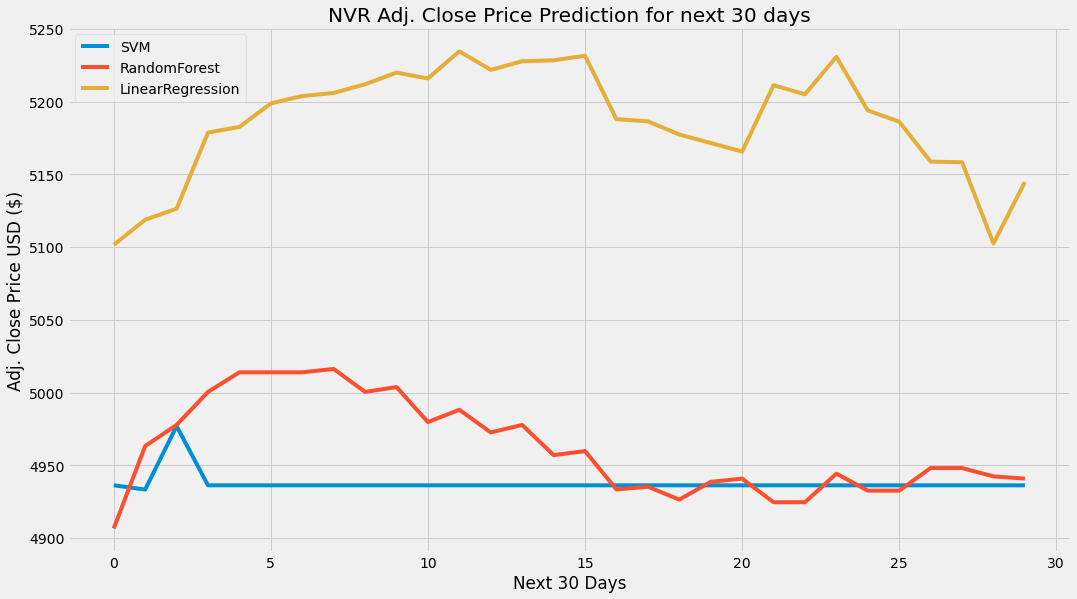

In [39]:
# visualizing the data
plt.figure(figsize=(16,9))

plt.plot(svr_prediction, label = 'SVM')
plt.plot(rf_prediction, label = 'RandomForest')
plt.plot(lr_prediction, label = 'LinearRegression')
plt.title('NVR Adj. Close Price Prediction for next 30 days')
plt.xlabel('Next 30 Days')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [40]:
# import NVR data for next 30 days to compare

NVR = pdr.get_data_yahoo('NVR',start='2021-12-01',end='2021-12-30')
NVR

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-01,5268.520020,5410.000000,5193.689941,5404.560059,5404.560059,60900
2021-12-02,5429.479980,5583.720215,5350.100098,5549.180176,5549.180176,26600
2021-12-03,5589.000000,5620.529785,5465.500000,5480.859863,5480.859863,24600
2021-12-06,5522.899902,5666.029785,5480.000000,5626.140137,5626.140137,16000
2021-12-07,5673.000000,5717.759766,5647.669922,5671.379883,5671.379883,15000
2021-12-08,5705.140137,5908.160156,5660.899902,5892.580078,5892.580078,42400
2021-12-09,5890.209961,5982.450195,5852.399902,5863.520020,5863.520020,23000
2021-12-10,5874.549805,5948.279785,5821.950195,5935.720215,5935.720215,12800
2021-12-13,5935.000000,5939.910156,5775.979980,5785.899902,5785.899902,19500


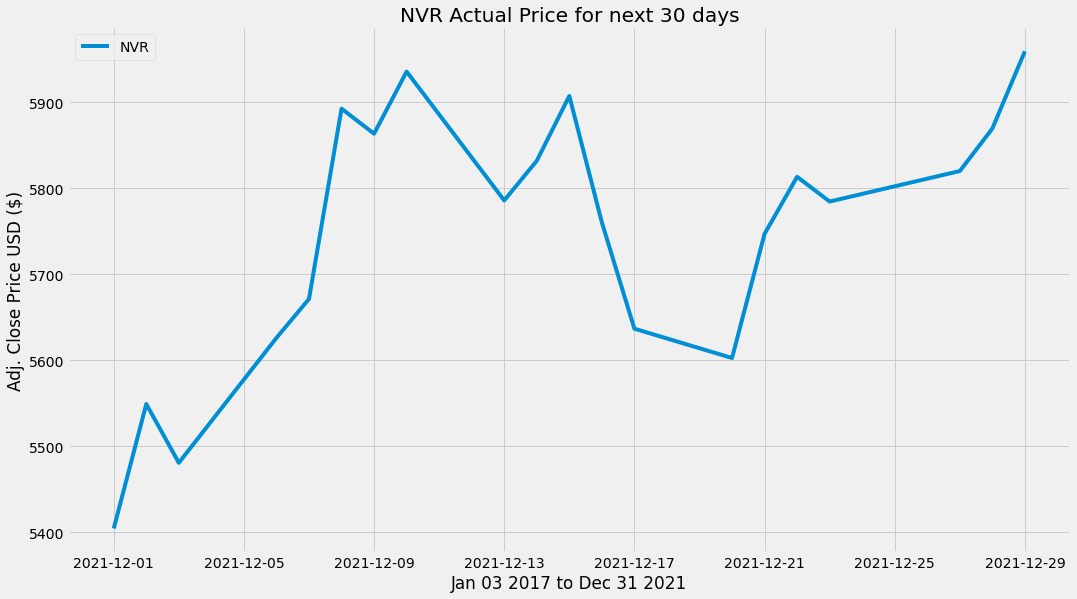

In [41]:
# visualizing the data
plt.figure(figsize=(16,9))
plt.plot(NVR['Adj Close'], label = 'NVR')
plt.title('NVR Actual Price for next 30 days')
plt.xlabel('Jan 03 2017 to Dec 31 2021')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()